## Time Independent Problem

As discussed in the [theory introduction](../../theory), the Fourier spectral method can be used to solve time-independent equations that consist only of linear terms. 

A classic example is Poisson’s equation:

$$
\nabla^2 \phi(\mathbf{x}) = s(\mathbf{x}),
$$

which can be solved in the Fourier domain as:

$$
\phi(\mathbf{x}) = \mathcal{F}^{-1}\left[\frac{\mathcal{F}[s(\mathbf{x})]}{(2\pi i \mathbf{f})^2}\right].
$$

In `TorchFSM`, this is achieved using the `solve` function of a `LinearOperator`. The `solve` function takes a right-hand-side tensor and returns the corresponding solution tensor.

The following example demonstrates how to solve Poisson’s equation with a given source tensor.


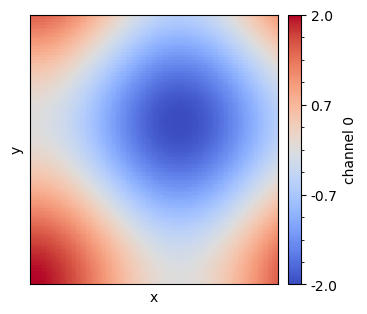

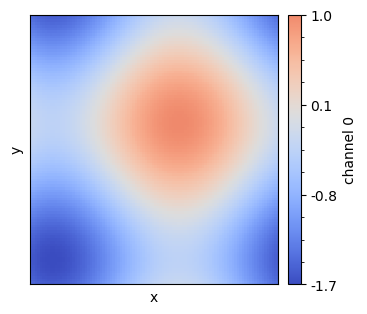

In [ ]:
from torchfsm.operator import Laplacian
from torchfsm.mesh import MeshGrid
from torchfsm.plot import plot_field
import torch

mesh=MeshGrid([(1,2*torch.pi,100)]*2)
x,y=mesh.bc_mesh_grid()
y=torch.cos(x)+torch.cos(y)
plot_field(y)
laplacian=Laplacian()
x=laplacian.solve(y,mesh=mesh,n_channel=1)
plot_field(laplacian.solve(y,mesh=mesh,n_channel=1))

## Time-Dependent Problem

For a time-dependent problem of the form:

$$
\frac{\partial \mathbf{u}}{\partial t} = F(u),
$$

where $F(u)$ is a function that can be represented by an `Operator`, we can directly solve it using the `integrate` function of the `Operator` class.

The following example demonstrates how to solve a simple 1D diffusion problem:


In [6]:
from torchfsm.field import wave_1d
from torchfsm.mesh import MeshGrid
from torchfsm.operator import Laplacian
from torchfsm.traj_recorder import AutoRecorder
from torchfsm.plot import plot_traj

mesh=MeshGrid([(0,1,100)])
x=mesh.bc_mesh_grid()
diffusion=0.01*Laplacian()
u0=wave_1d(x)
us=diffusion.integrate(u0,dt=0.01,step=20,mesh=mesh,trajectory_recorder=AutoRecorder())
plot_traj(us,animation=True)

We will show more examples on the simulation of different PDEs in next section.